In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta

In [2]:
Customers = pd.read_csv('Customer.csv')

In [3]:
Customers.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
Transactions = pd.read_csv('Transactions.csv')

In [5]:
Transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [6]:
Product_Hierarchy = pd.read_csv('prod_cat_info.csv')

In [7]:
Product_Hierarchy.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly. 

In [8]:
Customer_Final = pd.merge(left=pd.merge(left=Customers,right=Transactions,how='left',left_on='customer_Id',right_on='cust_id'),right=Product_Hierarchy,how='inner',left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'])

In [9]:
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,7.310943e+10,275152.0,25-03-2011,7.0,5.0,2.0,464.0,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,6.477727e+10,275034.0,23-05-2011,7.0,5.0,2.0,197.0,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,8.717434e+10,270829.0,9/12/2013,7.0,5.0,4.0,1141.0,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,7.624274e+10,267657.0,23-05-2013,7.0,5.0,4.0,1020.0,428.400,4508.400,e-Shop,Books,7,Fiction


In [13]:
Customer_Final.shape

(23053, 17)

In [11]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        23053 non-null  int64  
 1   DOB                23053 non-null  object 
 2   Gender             23044 non-null  object 
 3   city_code          23045 non-null  float64
 4   transaction_id     23053 non-null  float64
 5   cust_id            23053 non-null  float64
 6   tran_date          23053 non-null  object 
 7   prod_subcat_code   23053 non-null  float64
 8   prod_cat_code      23053 non-null  float64
 9   Qty                23053 non-null  float64
 10  Rate               23053 non-null  float64
 11  Tax                23053 non-null  float64
 12  total_amt          23053 non-null  float64
 13  Store_type         23053 non-null  object 
 14  prod_cat           23053 non-null  object 
 15  prod_sub_cat_code  23053 non-null  int64  
 16  prod_subcat        230

### 2. Prepare a summary report for the merged data set.

In [16]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,7.310943e+10,275152.0,25-03-2011,7.0,5.0,2.0,464.0,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,6.477727e+10,275034.0,23-05-2011,7.0,5.0,2.0,197.0,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,8.717434e+10,270829.0,9/12/2013,7.0,5.0,4.0,1141.0,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,7.624274e+10,267657.0,23-05-2013,7.0,5.0,4.0,1020.0,428.400,4508.400,e-Shop,Books,7,Fiction
5,274630,01-02-1970,M,4.0,7.835735e+10,274630.0,11/4/2012,7.0,5.0,1.0,646.0,67.830,713.830,TeleShop,Books,7,Fiction
6,273541,01-02-1970,M,4.0,2.391682e+10,273541.0,9/2/2013,7.0,5.0,4.0,410.0,172.200,1812.200,e-Shop,Books,7,Fiction
7,269008,13-02-1970,F,6.0,3.556057e+10,269008.0,9/3/2013,7.0,5.0,1.0,1441.0,151.305,1592.305,e-Shop,Books,7,Fiction
8,269008,13-02-1970,F,6.0,9.403331e+10,269008.0,26-04-2012,7.0,5.0,5.0,746.0,391.650,4121.650,MBR,Books,7,Fiction
9,267199,14-02-1970,NaN,2.0,5.674926e+10,267199.0,11/1/2012,7.0,5.0,4.0,1049.0,440.580,4636.580,MBR,Books,7,Fiction


####  2.a. Get the column names and their corresponding data types

In [17]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        23053 non-null  int64  
 1   DOB                23053 non-null  object 
 2   Gender             23044 non-null  object 
 3   city_code          23045 non-null  float64
 4   transaction_id     23053 non-null  float64
 5   cust_id            23053 non-null  float64
 6   tran_date          23053 non-null  object 
 7   prod_subcat_code   23053 non-null  float64
 8   prod_cat_code      23053 non-null  float64
 9   Qty                23053 non-null  float64
 10  Rate               23053 non-null  float64
 11  Tax                23053 non-null  float64
 12  total_amt          23053 non-null  float64
 13  Store_type         23053 non-null  object 
 14  prod_cat           23053 non-null  object 
 15  prod_sub_cat_code  23053 non-null  int64  
 16  prod_subcat        230

####  2. b. Top/Bottom 10 observations

In [18]:
#Top 10 Observations
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,268408.0,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,7.310943e+10,275152.0,25-03-2011,7.0,5.0,2.0,464.0,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,6.477727e+10,275034.0,23-05-2011,7.0,5.0,2.0,197.0,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,8.717434e+10,270829.0,9/12/2013,7.0,5.0,4.0,1141.0,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,7.624274e+10,267657.0,23-05-2013,7.0,5.0,4.0,1020.0,428.400,4508.400,e-Shop,Books,7,Fiction
5,274630,01-02-1970,M,4.0,7.835735e+10,274630.0,11/4/2012,7.0,5.0,1.0,646.0,67.830,713.830,TeleShop,Books,7,Fiction
6,273541,01-02-1970,M,4.0,2.391682e+10,273541.0,9/2/2013,7.0,5.0,4.0,410.0,172.200,1812.200,e-Shop,Books,7,Fiction
7,269008,13-02-1970,F,6.0,3.556057e+10,269008.0,9/3/2013,7.0,5.0,1.0,1441.0,151.305,1592.305,e-Shop,Books,7,Fiction
8,269008,13-02-1970,F,6.0,9.403331e+10,269008.0,26-04-2012,7.0,5.0,5.0,746.0,391.650,4121.650,MBR,Books,7,Fiction
9,267199,14-02-1970,NaN,2.0,5.674926e+10,267199.0,11/1/2012,7.0,5.0,4.0,1049.0,440.580,4636.580,MBR,Books,7,Fiction


In [19]:
#Bottom 10 Observations
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23043,268914,15-11-1992,F,3.0,1.407824e+09,268914.0,10/6/2011,10.0,5.0,1.0,1252.0,131.460,1383.460,MBR,Books,10,Non-Fiction
23044,269519,17-11-1992,M,9.0,2.971950e+10,269519.0,24-12-2013,10.0,5.0,4.0,1036.0,435.120,4579.120,TeleShop,Books,10,Non-Fiction
23045,273524,25-11-1992,F,1.0,2.576281e+10,273524.0,19-11-2012,10.0,5.0,1.0,1401.0,147.105,1548.105,Flagship store,Books,10,Non-Fiction
23046,272141,02-12-1992,F,10.0,7.133709e+10,272141.0,22-07-2012,10.0,5.0,-3.0,-1422.0,447.930,-4713.930,e-Shop,Books,10,Non-Fiction
23047,272141,02-12-1992,F,10.0,7.133709e+10,272141.0,16-07-2012,10.0,5.0,3.0,1422.0,447.930,4713.930,e-Shop,Books,10,Non-Fiction
23048,267812,04-12-1992,F,1.0,6.354038e+10,267812.0,10/10/2012,10.0,5.0,3.0,224.0,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,09-12-1992,F,7.0,7.179320e+10,274618.0,17-08-2013,10.0,5.0,4.0,691.0,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,15-12-1992,F,7.0,9.121711e+10,268097.0,1/2/2012,10.0,5.0,2.0,411.0,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,15-12-1992,F,7.0,9.011448e+10,268097.0,31-01-2011,10.0,5.0,-4.0,-1408.0,591.360,-6223.360,e-Shop,Books,10,Non-Fiction
23052,268097,15-12-1992,F,7.0,9.011448e+10,268097.0,26-01-2011,10.0,5.0,4.0,1408.0,591.360,6223.360,e-Shop,Books,10,Non-Fiction


#### 2.c.  “Five-number summary” for continuous variables (min, Q1, median, Q3 and max) 

In [20]:
Customer_Final.describe()

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
count,23053.000000,23045.000000,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,271021.746497,5.482534,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,6.149091
std,2431.692059,2.863499,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,3.726372
min,266783.000000,1.000000,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,268935.000000,3.000000,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000
50%,270980.000000,5.000000,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,5.000000
75%,273114.000000,8.000000,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,10.000000
max,275265.000000,10.000000,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,12.000000


#### 2.d. Frequency tables for all the categorical variables 

In [21]:
# Convert DOB type to datetime object
Customer_Final.DOB=pd.to_datetime(Customer_Final.DOB,format="%d-%m-%Y")

In [22]:
# Convert transaction date type to datetime object
def convertDateTime(x):
    x=x.replace('/','-')
    x=pd.to_datetime(x,format='%d-%m-%Y')
    return x

In [23]:
Customer_Final.tran_date=Customer_Final.tran_date.apply(lambda x: convertDateTime(x))

In [24]:
def frequency_tables(x):
    plt.figure(figsize=(4,3))
    sns.countplot(x)
    plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


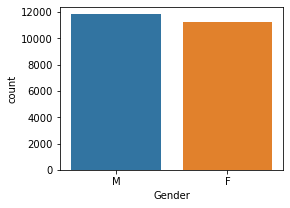

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


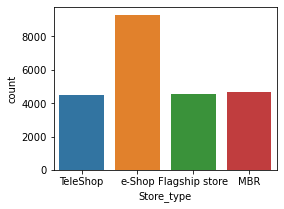

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


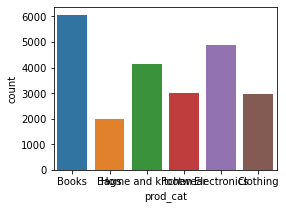

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


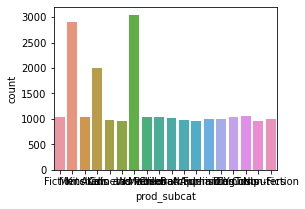

Gender         None
Store_type     None
prod_cat       None
prod_subcat    None
dtype: object

In [25]:
Customer_Final.select_dtypes(['object']).apply(lambda x: frequency_tables(x))

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables. 

In [26]:
def fn_hist(x):
    plt.figure(figsize=(3, 2))
    x.hist()
    plt.grid(True)
    plt.title('This is a hist for ' + x.name)
    plt.show()

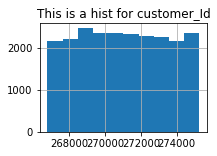

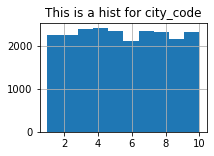

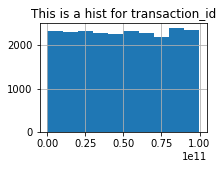

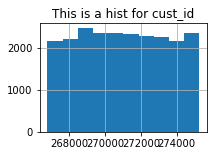

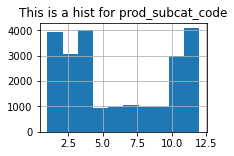

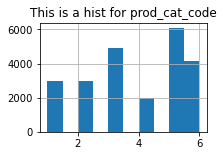

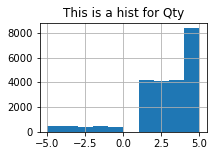

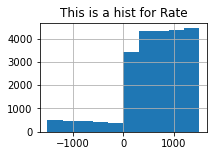

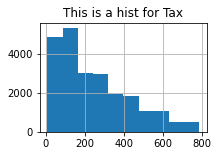

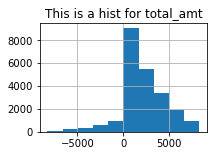

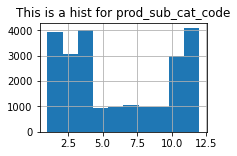

customer_Id          None
city_code            None
transaction_id       None
cust_id              None
prod_subcat_code     None
prod_cat_code        None
Qty                  None
Rate                 None
Tax                  None
total_amt            None
prod_sub_cat_code    None
dtype: object

In [27]:
Customer_Final.select_dtypes(['float64','int64']).apply(fn_hist)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


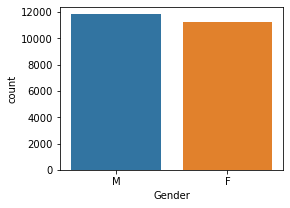

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


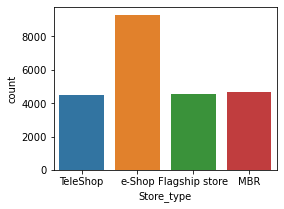

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


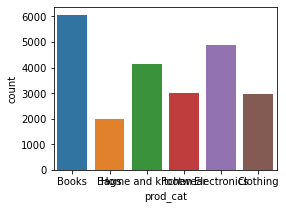

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


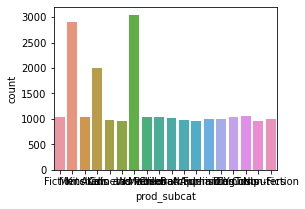

Gender         None
Store_type     None
prod_cat       None
prod_subcat    None
dtype: object

In [28]:
Customer_Final.select_dtypes(['object']).apply(lambda x: frequency_tables(x))

### 4. Calculate the following information using the merged dataset : 

####  a. Time period of the available transaction data

In [29]:
# Time period of the available transaction data
Max_Available_Date=Customer_Final.tran_date.max()

In [30]:
Max_Available_Date

Timestamp('2014-02-28 00:00:00')

In [31]:
Min_Available_Date=Customer_Final.tran_date.min()

In [32]:
Min_Available_Date

Timestamp('2011-01-25 00:00:00')

In [33]:
(Max_Available_Date - Min_Available_Date).days

1130

####  b. Count of transactions where the total amount of transaction was negative

In [34]:
# Count of transactions where the total amount of transaction was negative
Customer_Final.loc[(Customer_Final.Qty < 0)].shape

(2177, 17)

In [35]:
Customer_Final.loc[(Customer_Final.Qty < 0)].count()

customer_Id          2177
DOB                  2177
Gender               2176
city_code            2177
transaction_id       2177
cust_id              2177
tran_date            2177
prod_subcat_code     2177
prod_cat_code        2177
Qty                  2177
Rate                 2177
Tax                  2177
total_amt            2177
Store_type           2177
prod_cat             2177
prod_sub_cat_code    2177
prod_subcat          2177
dtype: int64

### 5. Analyze which product categories are more popular among females vs male customers. 

In [36]:
# Analyze which product categories are more popular among females vs male customers. 
Customer_Final.Gender.count()

23044

In [37]:
gender_cat_count = Customer_Final.groupby(['prod_cat', 'Gender']).agg({'Gender': 'count'})

In [38]:
product_cat_count = Customer_Final.groupby(['prod_cat']).agg('count')

In [39]:
product_cat_gender = gender_cat_count.div(product_cat_count, level = "prod_cat") * 100

In [40]:
product_cat_gender.loc[: , 'Gender']

prod_cat          Gender
Bags              F         49.749750
                  M         50.250250
Books             F         48.623248
                  M         51.376752
Clothing          F         48.664187
                  M         51.335813
Electronics       F         47.529604
                  M         52.470396
Footwear          F         51.000667
                  M         48.999333
Home and kitchen  F         48.304264
                  M         51.695736
Name: Gender, dtype: float64

### 6. Which City code has the maximum customers and what was the percentage of customers from that city? 

In [41]:
# Which City code has the maximum customers and what was the percentage of customers from that city? 
City_Code_Customers=Customer_Final.groupby('city_code').customer_Id.max().reset_index()

In [42]:
City_Code_Customers.sort_values('customer_Id',ascending=False).head(1)

,city_code,customer_Id
2,3.0,275265


In [43]:
City_Code_Customers['Customer_Percentage']=(City_Code_Customers.customer_Id/City_Code_Customers.customer_Id.sum())*100

In [44]:
City_Code_Customers

,city_code,customer_Id,Customer_Percentage
0,1.0,275250,10.000127
1,2.0,275249,10.000091
2,3.0,275265,10.000672
3,4.0,275264,10.000636
4,5.0,275257,10.000381
5,6.0,275252,10.000200
6,7.0,275206,9.998529
7,8.0,275244,9.999909
8,9.0,275216,9.998892
9,10.0,275262,10.000563


### 7. Which store type sells the maximum products by value and by quantity?

In [45]:
# Which store type sells the maximum products by value and by quantity?
ProductValue=Customer_Final.groupby('Store_type')[['Qty','total_amt']].agg({'Qty':'sum','total_amt':'sum'}).reset_index()

In [14]:
ProductValue.sort_values(['Qty','total_amt'],ascending=False)

NameError: name 'ProductValue' is not defined

### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores? 

In [47]:
#What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores? 
StoreCategory=Customer_Final.loc[((Customer_Final.Store_type=='Flagship store') & ((Customer_Final.prod_cat == 'Electronics') | (Customer_Final.prod_cat == 'Clothing')))]

In [48]:
StoreCategory.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
4095,274630,1970-02-01,M,4.0,7.853109e+10,274630.0,2011-07-14,9.0,3.0,5.0,653.0,342.825,3607.825,Flagship store,Electronics,9,Cameras
4100,270986,1970-03-27,M,10.0,1.435274e+10,270986.0,2012-06-01,9.0,3.0,4.0,525.0,220.500,2320.500,Flagship store,Electronics,9,Cameras
4101,270780,1970-04-18,F,3.0,5.397892e+10,270780.0,2012-06-06,9.0,3.0,3.0,730.0,229.950,2419.950,Flagship store,Electronics,9,Cameras
4106,271031,1970-06-09,F,2.0,6.829161e+10,271031.0,2012-02-17,9.0,3.0,1.0,926.0,97.230,1023.230,Flagship store,Electronics,9,Cameras
4107,273162,1970-06-19,M,8.0,6.886797e+10,273162.0,2011-11-13,9.0,3.0,1.0,1411.0,148.155,1559.155,Flagship store,Electronics,9,Cameras


In [49]:
StoreCategory.groupby('prod_cat').total_amt.sum()

prod_cat
Clothing       1194423.23
Electronics    2215136.04
Name: total_amt, dtype: float64

### 9. What was the total amount earned from "Male" customers under the "Electronics" category? 

In [50]:
#What was the total amount earned from "Male" customers under the "Electronics" category? 
Electronic_Category_Male=Customer_Final.loc[((Customer_Final.prod_cat_code==3.0) & (Customer_Final.Gender == 'M'))]

In [51]:
Electronic_Category_Male.total_amt.sum()

5703109.425

In [52]:
Electronic_Category_Male

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
4092,268408,1970-01-02,M,4.0,5.690286e+10,268408.0,2013-01-30,9.0,3.0,5.0,868.0,455.700,4795.700,e-Shop,Electronics,9,Cameras
4095,274630,1970-02-01,M,4.0,7.853109e+10,274630.0,2011-07-14,9.0,3.0,5.0,653.0,342.825,3607.825,Flagship store,Electronics,9,Cameras
4097,272359,1970-02-19,M,4.0,8.137937e+10,272359.0,2011-12-01,9.0,3.0,2.0,757.0,158.970,1672.970,e-Shop,Electronics,9,Cameras
4099,271692,1970-03-07,M,5.0,5.439176e+10,271692.0,2014-01-06,9.0,3.0,3.0,967.0,304.605,3205.605,TeleShop,Electronics,9,Cameras
4100,270986,1970-03-27,M,10.0,1.435274e+10,270986.0,2012-06-01,9.0,3.0,4.0,525.0,220.500,2320.500,Flagship store,Electronics,9,Cameras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22035,274107,1992-08-08,M,9.0,2.599429e+10,274107.0,2012-09-08,5.0,3.0,3.0,910.0,286.650,3016.650,e-Shop,Electronics,5,Computers
22037,269520,1992-08-19,M,10.0,8.153254e+10,269520.0,2013-04-12,5.0,3.0,2.0,615.0,129.150,1359.150,e-Shop,Electronics,5,Computers
22038,274573,1992-08-26,M,7.0,5.385213e+10,274573.0,2013-08-16,5.0,3.0,3.0,969.0,305.235,3212.235,e-Shop,Electronics,5,Computers
22043,267094,1992-11-24,M,9.0,1.290599e+10,267094.0,2014-01-26,5.0,3.0,1.0,1449.0,152.145,1601.145,e-Shop,Electronics,5,Computers


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts? 

In [53]:
# How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts? 
positiveQuantityCustomers= Customer_Final.loc[(Customer_Final.Qty > 0)]

In [54]:
customerTransaction=positiveQuantityCustomers.groupby('customer_Id').transaction_id.count().reset_index()

In [55]:
customerTransaction.head()

,customer_Id,transaction_id
0,266783,4
1,266784,3
2,266785,7
3,266788,4
4,266794,11


In [56]:
customerTransaction.loc[customerTransaction.transaction_id > 10]

,customer_Id,transaction_id
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


### 11. For all customers aged between 25 - 35, find out: 

In [57]:
# For all customers aged between 25 - 35
Customer_Final['Age']=Customer_Final.DOB.apply(lambda x: int((datetime.now()-x).days/365))

In [58]:
AgeFilter=Customer_Final.loc[(Customer_Final.Age > 25)&(Customer_Final.Age < 35)]

#### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [59]:
# What was the total amount spent for “Electronics” and “Books” product categories? 
CategoryAmount=AgeFilter.loc[(AgeFilter.prod_cat == 'Electronics') | (AgeFilter.prod_cat == 'Books')]

In [60]:
CategoryAmount.groupby('prod_cat').total_amt.sum()

prod_cat
Books          3191142.760
Electronics    2909209.745
Name: total_amt, dtype: float64

In [61]:
CategoryAmount.groupby('prod_cat').total_amt.sum().sum()

6100352.504999997

####  b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [62]:
# What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?
AgeFilter.loc[(AgeFilter.tran_date > pd.to_datetime("2014-01-01")) & (AgeFilter.tran_date < pd.to_datetime("2014-03-01"))]

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,Age
804,274923,1987-09-08,M,8.0,9.798862e+10,274923.0,2014-02-03,7.0,5.0,3.0,837.0,263.655,2774.655,e-Shop,Books,7,Fiction,34
805,274923,1987-09-08,M,8.0,2.164718e+10,274923.0,2014-01-29,7.0,5.0,5.0,812.0,426.300,4486.300,Flagship store,Books,7,Fiction,34
849,273731,1988-07-28,F,7.0,1.943545e+08,273731.0,2014-01-20,7.0,5.0,4.0,551.0,231.420,2435.420,Flagship store,Books,7,Fiction,33
870,270535,1988-12-13,F,7.0,8.175032e+10,270535.0,2014-01-17,7.0,5.0,1.0,1430.0,150.150,1580.150,e-Shop,Books,7,Fiction,32
889,273026,1989-04-21,M,10.0,4.674104e+10,273026.0,2014-01-28,7.0,5.0,5.0,1163.0,610.575,6425.575,MBR,Books,7,Fiction,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22915,275227,1989-09-23,M,4.0,7.688007e+10,275227.0,2014-02-08,10.0,5.0,3.0,298.0,93.870,987.870,MBR,Books,10,Non-Fiction,32
22922,269637,1989-12-10,F,1.0,4.287942e+10,269637.0,2014-01-14,10.0,5.0,1.0,778.0,81.690,859.690,MBR,Books,10,Non-Fiction,31
22958,272165,1990-12-01,M,4.0,9.103958e+10,272165.0,2014-01-09,10.0,5.0,-1.0,-1268.0,133.140,-1401.140,e-Shop,Books,10,Non-Fiction,31
22959,272165,1990-12-01,M,4.0,9.103958e+10,272165.0,2014-01-02,10.0,5.0,1.0,1268.0,133.140,1401.140,e-Shop,Books,10,Non-Fiction,31


In [63]:
AgeFilter.loc[(AgeFilter.tran_date > pd.to_datetime("2014-01-01")) & (AgeFilter.tran_date < pd.to_datetime("2014-03-01"))].total_amt.sum()

637989.43